`Handling missing value`      
"Missing values" : in feature engineering refers to data points within a dataset where information is absent for a specific variable, often represented by empty cells, or other special symbols.                  
Handling missing data properly is crucial for building accurate and reliable models.   
two main approaches to handle the missing values: 'removal' or 'imputation'.   


1. Removal (Dealing with Missing Data by Deletion):
- Listwise Deletion (Complete-Case Analysis): Remove rows with any missing values.
- Column Deletion: Remove columns with too many missing values.        
Pros: Simple to apply, no risk of introducing bias through imputation.    
Cons: Risk of losing valuable data, especially if the missingness is not random.    

2. Imputation (Filling Missing Data):
- Mean/Median/Mode Imputation: Fill with simple statistics (mean, median, or mode).
- KNN Imputation: Fill using values from the nearest neighbors.
- Regression Imputation: Predict missing values using a regression model.
- Multiple Imputation: Create multiple datasets to reflect the uncertainty of missing values.     
Pros: Retains all data points, can provide more accurate results than deletion.     
Cons: More complex, might introduce bias or reduce variability if not done carefully.   

`....`Choosing Between Removal and Imputation:
- Use Removal when:      
The dataset is large enough that deleting rows/columns won't affect the analysis.            
The amount of missing data is small and random.                      
You don't want to introduce any uncertainty with imputed values.      

- Use Imputation when:                       
The amount of missing data is significant.            
You want to retain all rows/columns in the dataset.          
You suspect that missingness is related to other variables, and simple deletion might bias your analysis.

There are three mechanisms to handling this missing values.   
1. MCAR (Missing Completely At Random): When the reason for missing data is unrelated to any other variables in the dataset.    
2. MAR (Missing At Random): When the reason for missing data is explained by other observed variables.
3. MNAR (Missing Not At Random): When the reason for missing data is related to the missing value itself, making it the most challenging scenario to handle.

MCAR: Removal CCA (listwise deletion) and imputation (mean/median) both work well.     
MAR: Imputation using regression, KNN, or multiple imputation works well. Deletion may be used, but it's often better to impute.     
MNAR: Handling MNAR data requires specialized methods (such as pattern-mixture or selection models). Removal is not recommended due to the high risk of introducing bias.    

When to use CCA   
if the data is MCAR   
less then 5% missing data 
<h3>CCA<h3>  

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./DataSets/32_data_science_job.csv')
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0


In [7]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [8]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [9]:
# df.isnull().sum()

# % data missing
df.isnull().mean()*100  

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [10]:
df.shape

(19158, 13)

In [11]:
# df.isnull()
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [12]:
# Apply CCA where total number of data is missing >5%
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
12227,0.890,no_enrollment,Graduate,20.0,192.0
13265,0.682,no_enrollment,Graduate,7.0,18.0
4624,0.926,no_enrollment,Graduate,14.0,198.0
18466,0.767,no_enrollment,Masters,9.0,61.0
17936,0.910,no_enrollment,Masters,20.0,64.0


In [14]:
print(len(df[cols].dropna()))
len(df[cols].dropna()) / len(df)   # ratio of missing data in original data

17182


0.8968577095730244

In [15]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

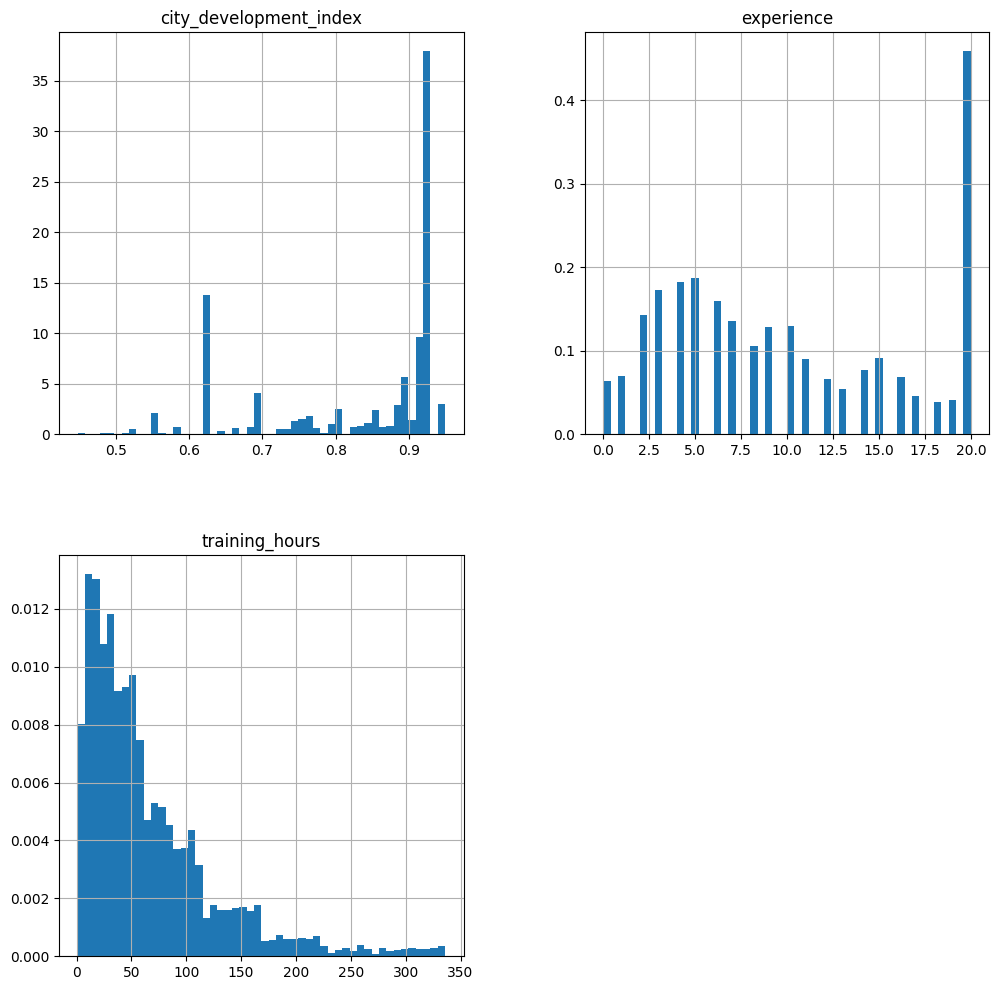

In [16]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

if the distributions of the data before and after applying CCA are comparable, it can suggest that the CCA process is working as expected, maintaining the general structure of the data.      

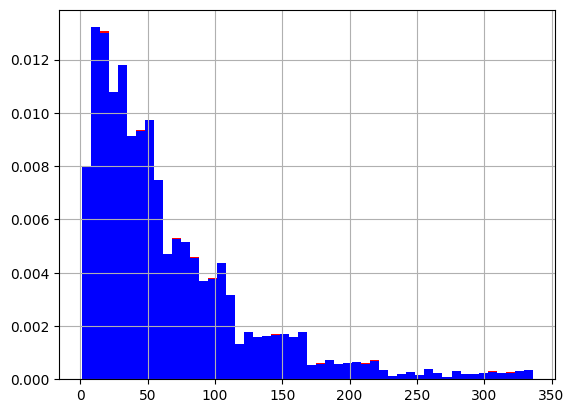

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111) # 111 is a shorthand notation for specifying the grid layout of the subplot.

df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')        # Original data 
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='blue')   # new data
plt.show()


<Axes: ylabel='Density'>

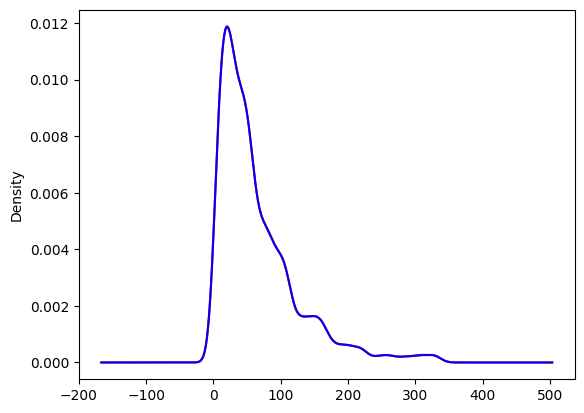

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color='red')         # Original data 
new_df['training_hours'].plot.density(color='blue')    # After CCA

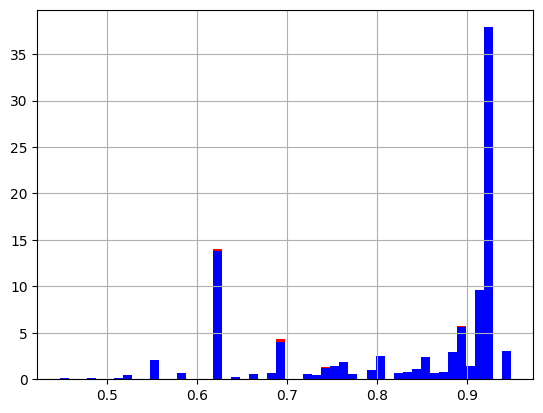

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')           
new_df['city_development_index'].hist(bins=50, ax=ax, density=True, color='blue')   
plt.show()

<Axes: ylabel='Density'>

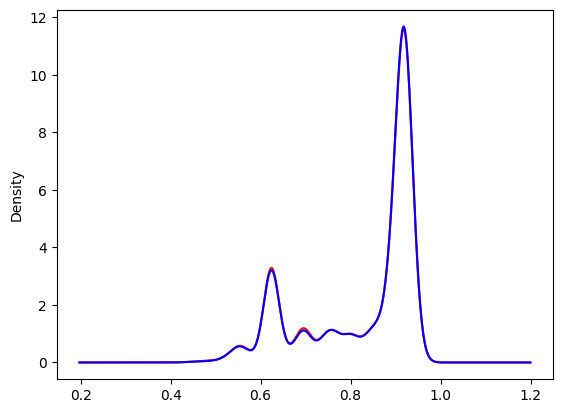

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')          
new_df['city_development_index'].plot.density(color='blue')    

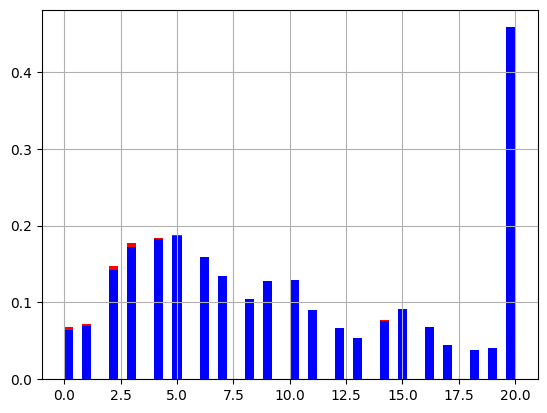

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].hist(bins=50, ax=ax, density=True, color='red')           
new_df['experience'].hist(bins=50, ax=ax, density=True, color='blue')   
plt.show()

<Axes: ylabel='Density'>

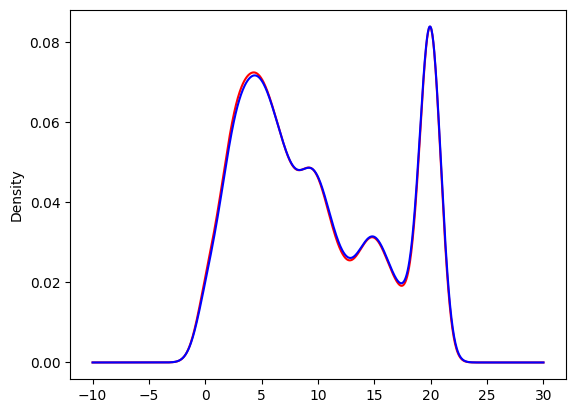

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].plot.density(color='red')          
new_df['experience'].plot.density(color='blue')    

CCA in categorical data  
Appling CCA is fine   

In [23]:
temp = pd.concat([
                df['enrolled_university'].value_counts() / len(df),
                new_df['enrolled_university'].value_counts() / len(new_df)
            ], axis=1)

temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [24]:
temp = pd.concat([
                df['education_level'].value_counts() / len(df),
                new_df['education_level'].value_counts() / len(new_df)
            ], axis=1)

temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
